In [2]:
import datasets
from datasets import load_dataset
import pandas as pd
# import seaborn as sns
from glob import glob
from tqdm import tqdm
import os,sys
import json
from transformers import AutoTokenizer
from sentence_transformers import SentenceTransformer
import torch

# haerae-hub web-text

In [2]:
ko_ds=load_dataset("HAERAE-HUB/KOREAN-WEBTEXT")

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1284879 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

In [27]:
ko_ds

Dataset({
    features: ['text', 'source', 'token_count', '__index_level_0__'],
    num_rows: 1284879
})

In [28]:
ko_ds=ko_ds.remove_columns('__index_level_0__')

In [34]:
ids=[]

for i in range(len(ko_ds)):
    ids.append(f"ko_{i}")
    


ko_ds=ko_ds.add_column("id",ids)

<Axes: ylabel='Count'>

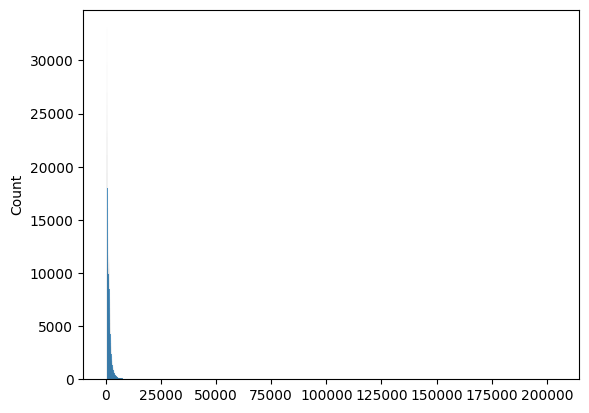

In [11]:
sns.histplot(ko_ds["token_count"])

<Axes: >

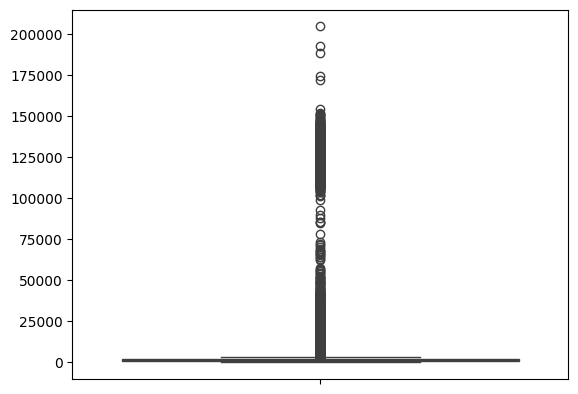

In [12]:
sns.boxplot(ko_ds["token_count"])

In [111]:
len(ko_ds)

1284178

In [110]:
ko_ds=ko_ds.filter(lambda x: "애니위즈" not in x["text"])

Filter:   0%|          | 0/1284187 [00:00<?, ? examples/s]

In [179]:
ko_ds=ko_ds.select(range(90,len(ko_ds)))

In [188]:
ko_ds.save_to_disk("/azurestorage/data/cpt/KOREAN-WEBTEXT-filtered")

Saving the dataset (0/18 shards):   0%|          | 0/1284088 [00:00<?, ? examples/s]

In [191]:
ko_ds_under_8000=ko_ds.filter(lambda x: x["token_count"]<=8000)

Filter:   0%|          | 0/1284088 [00:00<?, ? examples/s]

<Axes: >

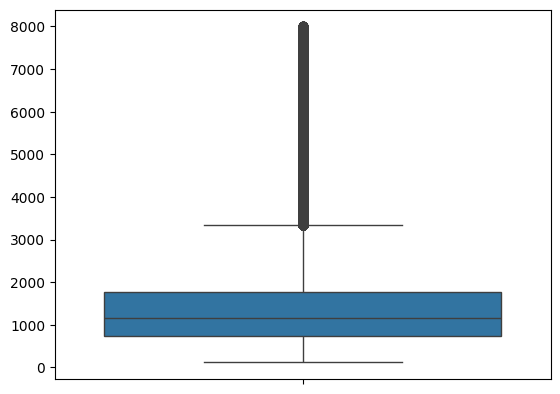

In [193]:
sns.boxplot(ko_ds_under_8000["token_count"])

In [195]:
len(ko_ds)

1284088

In [194]:
sum(ko_ds_under_8000["token_count"])

1838660204

In [196]:
ko_ds_1000=ko_ds_under_8000.filter(lambda x:x["token_count"]<1000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [198]:
len(ko_ds_1000)

540331

In [199]:
ko_ds_1000_2000=ko_ds_under_8000.filter(lambda x:x["token_count"]>=1000 and x["token_count"]<2000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [200]:
ko_ds_1000_2000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 490368
})

In [201]:
ko_ds_2000_4000=ko_ds_under_8000.filter(lambda x:x["token_count"]>=2000 and x["token_count"]<4000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [207]:
ko_ds_2000_4000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 204446
})

In [208]:
sum(ko_ds_2000_4000["token_count"])

539554396

In [203]:
ko_ds_over_4000=ko_ds_under_8000.filter(lambda x:x["token_count"]>=4000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [204]:
ko_ds_over_4000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [206]:
sum(ko_ds_over_4000["token_count"])

202981450

In [211]:
ko_ds_over_4000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [214]:
ko_ds_2000_4000.shuffle().select(range(len(ko_ds_over_4000)))

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [ ]:
[ko_ds_2000_4000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000_2000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_over_4000]

In [215]:
ko_ds_1000_2000.shuffle().select(range(len(ko_ds_over_4000)))

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [216]:
ko_ds_1000.shuffle().select(range(len(ko_ds_over_4000)))

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [265]:
ko_ds_sampled=datasets.concatenate_datasets([ko_ds_2000_4000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000_2000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_over_4000.shuffle()])

In [266]:
ko_ds_sampled=ko_ds_sampled.shuffle()

In [267]:
sum(ko_ds_sampled["token_count"])

388213808

In [268]:
ko_ds_sampled.save_to_disk("/azurestorage/data/cpt/KOREAN-WEBTEXT-sampled_150K_380MT")

Saving the dataset (0/3 shards):   0%|          | 0/154340 [00:00<?, ? examples/s]

# fineweb-edu

In [232]:
en_ds=load_dataset("deatos/fineweb-edu-mini-combined")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [237]:
en_ds_train=en_ds["train"]
en_ds_valid=en_ds["validation"]

In [250]:
en_ds=datasets.concatenate_datasets([en_ds_train,en_ds_valid)

In [254]:
sum(en_ds["token_count"])

2451298930

In [256]:
en_ds_filtered=en_ds.filter(lambda x:x["token_count"]<=8000)

Filter:   0%|          | 0/2364101 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
    num_rows: 2364101
})

In [257]:
en_ds_filtered

Dataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
    num_rows: 2341329
})

<Axes: ylabel='Count'>

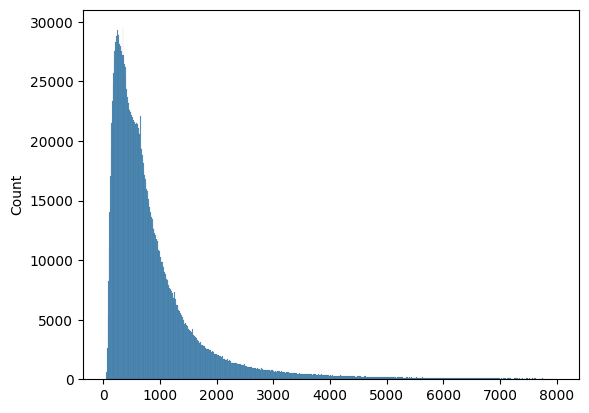

In [260]:
sns.histplot(en_ds_filtered["token_count"])

<Axes: >

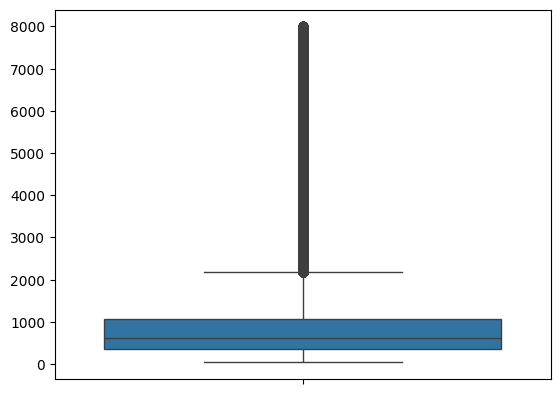

In [261]:
sns.boxplot(en_ds_filtered["token_count"])

In [259]:
sum(en_ds_filtered.select(range(15000))["token_count"])

13409036

In [262]:
en_ds_filtered_1000=en_ds_filtered.filter(lambda x:x["token_count"]<1000)
en_ds_filtered_1000_2000=en_ds_filtered.filter(lambda x:x["token_count"]>=1000 and x["token_count"]<2000)
en_ds_filtered_2000_2000=en_ds_filtered.filter(lambda x:x["token_count"]>=2000 and x["token_count"]<4000)
en_ds_filtered_4000_8000=en_ds_filtered.filter(lambda x:x["token_count"]>=4000)

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

In [277]:
[en_ds_filtered_4000_8000.shuffle().select(range(3800)),en_ds_filtered_2000_4000.shuffle().select(range(3800)),en_ds_filtered_1000_2000.shuffle().select(range(3800)),en_ds_filtered_1000.shuffle().select(range(3800))]

[Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 }),
 Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 }),
 Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 }),
 Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 })]

In [284]:
en_ds_filtered_concat=datasets.concatenate_datasets([en_ds_filtered_4000_8000.shuffle().select(range(3800)),en_ds_filtered_2000_4000.shuffle().select(range(4000)),en_ds_filtered_1000_2000.shuffle().select(range(4000)),en_ds_filtered_1000.shuffle().select(range(4000))])

In [286]:
en_ds_filtered_concat=en_ds_filtered_concat.train_test_split(test_size=0.05)

In [288]:
en_ds_filtered_concat

DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
        num_rows: 15010
    })
    test: Dataset({
        features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
        num_rows: 790
    })
})

In [283]:
sum(en_ds_filtered_concat["token_count"])

37942635

In [287]:
en_ds_filtered_concat.save_to_disk("/azurestorage/data/cpt/fineweb-edu-sampled_15K_38MT")

Saving the dataset (0/1 shards):   0%|          | 0/15010 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/790 [00:00<?, ? examples/s]

In [291]:
en_ds_filtered_concat["train"].select_columns("text")

Dataset({
    features: ['text'],
    num_rows: 15010
})

# AI-hub dataset

In [80]:
base_path = '/azurestorage/data/cpt/ai_hub/'

## 금융-법률 기계독해

In [183]:
fin_law_rc= base_path+"금융-법률독해/"

In [82]:
os.listdir(fin_law_rc)

['금융-법률독해_multiple_choice_train.json',
 '금융-법률독해_multiple_choice_valid.json',
 '금융-법률독해_span_extraction_how_train.json',
 '금융-법률독해_span_extraction_how_valid.json',
 '금융-법률독해_span_extraction_train.json',
 '금융-법률독해_span_extraction_valid.json',
 '금융-법률독해_tableqa_train.json',
 '금융-법률독해_tableqa_valid.json',
 '금융-법률독해_text_entailment_train.json',
 '금융-법률독해_text_entailment_valid.json']

In [83]:
doc_class=set()

for file in os.listdir(fin_law_rc):

    with open(fin_law_rc+file,"r",encoding="utf-8-sig") as f:
        sample=json.load(f)
    data=sample['data']

    for d in data:
        doc_class.add(d['doc_class']['class'])

In [84]:
doc_class

{'금융/사회과학/경제정책',
 '금융/사회과학/금융경제',
 '금융/사회과학/금융기관경영',
 '금융/사회과학/기업경영윤리',
 '금융/사회과학/보험학',
 '금융/사회과학/소비경제',
 '금융/사회과학/재무관리',
 '금융/사회과학/재정공공경제',
 '금융/사회과학/회계',
 '법률/농수해양학/해사법학',
 '법률/복합학/과학기술과법',
 '법률/복합학/과학기술법과정책',
 '법률/복합학/법여성',
 '법률/사회과학/공법',
 '법률/사회과학/관광학일반',
 '법률/사회과학/기타법학',
 '법률/사회과학/노동·법률정책',
 '법률/사회과학/무역계약·관습및통상법',
 '법률/사회과학/법정책학',
 '법률/사회과학/법학일반',
 '법률/사회과학/분야별법',
 '법률/사회과학/사법',
 '법률/사회과학/신문방송학일반'}

In [85]:
selected_category=['금융/사회과학/경제정책',
 '금융/사회과학/금융경제',
 '금융/사회과학/금융기관경영',
 '금융/사회과학/기업경영윤리',
 '금융/사회과학/보험학',
 '금융/사회과학/소비경제',
 '금융/사회과학/재무관리',
 '금융/사회과학/재정공공경제',
 '금융/사회과학/회계',
'법률/사회과학/무역계약·관습및통상법',]

In [86]:
dataset=[]


for file in os.listdir(fin_law_rc):

    with open(fin_law_rc+file,"r",encoding="utf-8-sig") as f:
        sample=json.load(f)
    data=sample['data']

    for d in data:
        if d['doc_class']['class'] in selected_category:
            dataset.append(d)
        

1. doc_id 기준으로 정렬
2. context_id 기준으로 정렬
3. doc_id과 똑같고 context_id가 연속하는 문서들 합치기 until <= max_length

In [87]:
dataset[0]

{'doc_id': 'TNL040481',
 'doc_title': '한ㆍ미 FTA 비준동의 전망 관련 논의',
 'doc_source': '국회입법조사처',
 'doc_published': 20110623,
 'created': '20221219143852',
 'doc_class': {'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'},
 'paragraphs': [{'context_id': '2363945',
   'context': '1. 들어가며\n정부는 지난 6월 3일 한ㆍ미 FTA 비준동의안을 추가협상 합의문서와 함께 하나의 비준동의안으로 묶어 국회에 제출하였다. 우리 국회의 한ㆍ미 FTA에 대한 입장은 ① 미국 의회의 동향을 예의주시하면서 원만한 국회통과를 위해 노력한다는 입장과 ② 양국의 이익균형 회복을 위해 재재협상을 해야 한다는 입장으로 나뉘어 있는 상태이다.\n현재 미 의회에서도 추가협상 직후 우리 측 기대와는 달리 한ㆍ미 FTA 인준을 받을 수 있을지 여부가 불투명한 상태인 것으로 보도되고 있다. 아직까지 미 행정부가 한ㆍ미 FTA 이행법안을 의회에 제출하지 않았음은 물론, 한ㆍ미 FTA 이행법안 처리문제가 무역조정지원법 개정 문제와 결부되면서 112대 의회에서의 처리는 어려울 것이라는 전망이 나오고 있다.\n이 글에서는 미국 의회의 한ㆍ미 FTA 인준 및 우리 국회에서의 한ㆍ미 FTA 비준동의와 관련한 논의를 정리함으로써 향후 한ㆍ미 FTA에 관한 정책결정시 고려해야 할 사항들을 제시하고자 한다.\n이를 위해 미국 의회와 우리 국회가 한ㆍ미 FTA를 인준 또는 비준동의할 수 있을지 여부에 대한 논의들을 살펴본 후, 한ㆍ미 FTA 비준동의절차와 관련하여 논의되고 있는 미국산 쇠고기 수입 문제, 소위 ‘독소조항’의 존재여부에 관한 문제, 국회 입법형성권의 제약 문제를 언급하고자 한다.',
   'tbs': None,
   'qas': [{'qa_type': 4,
     'question_id': '63

In [88]:
for data in dataset:
    data["context"]=data['paragraphs'][0]["context"]

In [89]:
dataset[1]

{'doc_id': 'TNL040481',
 'doc_title': '한ㆍ미 FTA 비준동의 전망 관련 논의',
 'doc_source': '국회입법조사처',
 'doc_published': 20110623,
 'created': '20221219143852',
 'doc_class': {'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'},
 'paragraphs': [{'context_id': '2363946',
   'context': '2. 미 의회에서의 한ㆍ미 FTA 인준 전망\n2010년 12월 3일 한ㆍ미 FTA 추가협상 타결 직후에는 미 행정부가 조만간 한ㆍ미 FTA 이행법안을 미 의회에 제출하고 금년 상반기 중 인준을 완료할 것이라는 전망이 있었다.\n한ㆍ미 FTA 추가협상 타결 이후 상ㆍ하원 대다수 의원들이 한ㆍ미 FTA 인준의 조속한 추진에 초당적 지지를 표명하였고, 미 자동차 노조도 찬성 입장으로 돌아선 것으로 알려졌기 때문이다.\n다만 한국의 쇠고기 시장 개방에 관심이 큰 Baucus 상원 재무위원장의 입장에 대한 우려가 남아 있었지만, 현재 Baucus 상원 재무위원장은 우리 정부가 ｢미국산 쇠고기 수입위생조건｣ 제25조에 따른 협의(consultations)를 이행할 것을 전제조건으로 내세우며 한ㆍ미 FTA를 찬성하는 입장으로 전향한 것으로 알려져 있다.',
   'tbs': None,
   'qas': [{'qa_type': 4,
     'question_id': '6394094',
     'question': '한국이 미국산 쇠고기를 충분히 수입하지 않을까 봐 걱정하는 건 누구야',
     'answer': {'source': '2363946',
      'text': '상원 재무위원장',
      'answer_start': None,
      'answer_end': None,
      'cell_text': None,
      'cell_coordinates': None,
  

<Axes: >

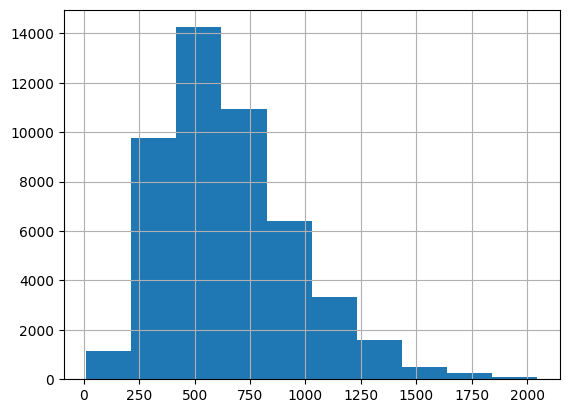

In [108]:
df['context'].str.len().hist()

In [111]:
df

,doc_id,doc_title,doc_source,doc_published,created,doc_class,paragraphs,context
0,TNL040481,한ㆍ미 FTA 비준동의 전망 관련 논의,국회입법조사처,20110623,20221219143852,"{'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'}","[{'context_id': '2363945', 'context': '1. 들어가며...",1. 들어가며\n정부는 지난 6월 3일 한ㆍ미 FTA 비준동의안을 추가협상 합의문서...
1,TNL040481,한ㆍ미 FTA 비준동의 전망 관련 논의,국회입법조사처,20110623,20221219143852,"{'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'}","[{'context_id': '2363946', 'context': '2. 미 의회...",2. 미 의회에서의 한ㆍ미 FTA 인준 전망\n2010년 12월 3일 한ㆍ미 FTA...
2,TNL040481,한ㆍ미 FTA 비준동의 전망 관련 논의,국회입법조사처,20110623,20221219143852,"{'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'}","[{'context_id': '2363947', 'context': '이러한 상황에...",이러한 상황에서 2011년 5월 28일 미국의 유력한 일간지인 월스트리트 저널에 한...
3,TNL040481,한ㆍ미 FTA 비준동의 전망 관련 논의,국회입법조사처,20110623,20221219143852,"{'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'}","[{'context_id': '2363948', 'context': 'TAA는 상징...","TAA는 상징성이 강한 제도로, 비용대비 정치적 효과가 매우 높다는 평가를 받았다...."
4,TNL040481,한ㆍ미 FTA 비준동의 전망 관련 논의,국회입법조사처,20110623,20221219143852,"{'class': '법률/사회과학/무역계약·관습및통상법', 'code': '연구보고서'}","[{'context_id': '2363949', 'context': '3. 우리 국...",3. 우리 국회에서 한ㆍ미 FTA 비준동의 전망\n정부는 지난 4월 27일 한ㆍ미 ...
...,...,...,...,...,...,...,...,...
48353,TDF015346,자영업자 실업급여 수급자격 인정요건 개선 연구 (한국조세재정연구원:김재진·구자은),고용노동부(제1유형),20191230,20221219143840,"{'class': '금융/사회과학/금융경제', 'code': '연구자료'}","[{'context_id': '2640795', 'context': '□ 자영업자 ...",□ 자영업자 실업급여 수급과 관련하여 폐업으로 인한 실직상태에 대하여 자영업자의 소...
48354,TDF015346,자영업자 실업급여 수급자격 인정요건 개선 연구 (한국조세재정연구원:김재진·구자은),고용노동부(제1유형),20191230,20221219143840,"{'class': '금융/사회과학/금융경제', 'code': '연구자료'}","[{'context_id': '2640796', 'context': '3. 핀란드 ...",3. 핀란드\n가. 고용보험 가입\n□ 핀란드의 실업보험은 기초 실업급여와 소득비례...
48355,TDF015346,자영업자 실업급여 수급자격 인정요건 개선 연구 (한국조세재정연구원:김재진·구자은),고용노동부(제1유형),20191230,20221219143840,"{'class': '금융/사회과학/금융경제', 'code': '연구자료'}","[{'context_id': '2640797', 'context': '나. 실업급여...",나. 실업급여\n□ 기초 실업급여의 수급요건은 핀란드 거주자이면서 실직 전 일정기간...
48356,TDF015346,자영업자 실업급여 수급자격 인정요건 개선 연구 (한국조세재정연구원:김재진·구자은),고용노동부(제1유형),20191230,20221219143840,"{'class': '금융/사회과학/금융경제', 'code': '연구자료'}","[{'context_id': '2640798', 'context': '□ 실업상태에...",□ 실업상태에서 시간제나 부수적인 직업을 가지는 다음의 경우라도 조정된 실업급여(a...


In [110]:
doc_ids=df["doc_id"].values
contexts=df["context"].values

In [114]:
id_to_doc={}

for i,c in zip(doc_ids,contexts):
    if i in id_to_doc:
        id_to_doc[i].append(c)
    else:
        id_to_doc[i]=[c]

    

In [122]:
tokenizer=AutoTokenizer.from_pretrained("BAAI/bge-m3")

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

In [158]:
max_length=6000

doc_list=[]

for id,c_list in id_to_doc.items():
    # id: c_list - > [str, str]
    temp_c=[]
    temp_len=0
    for idx,c in enumerate(c_list):
        c_len=len(tokenizer.tokenize(c))
        
        if temp_len+c_len<=max_length and idx!=len(c_list)-1:
            temp_c.append(c)
            temp_len+=c_len
            continue
        if idx==len(c_list)-1 and not temp_c:
            doc_list.append({id:c})
            break
        
        new_c="".join(temp_c)
        doc_list.append({id:new_c})
        temp_c=[c]
        temp_len=c_len

        if idx==len(c_list)-1:
            doc_list.append({id:c})


8007

In [176]:
df[df["doc_id"]=='TDF040021']

,doc_id,doc_title,doc_source,doc_published,created,doc_class,paragraphs,context
45448,TDF040021,2022년 전국민 금융이해력 조사를 실시합니다!,금융감독원,20220829,20221219143830,"{'class': '금융/사회과학/금융기관경영', 'code': '보도자료'}","[{'context_id': '2550618', 'context': '□ 금융감독원...","□ 금융감독원과 한국은행은 2022년 8월 29일부터 11월 30일까지 전국 2,4..."


In [175]:
doc_list[-2]

{'TDF040021': '□ 금융감독원과 한국은행은 2022년 8월 29일부터 11월 30일까지 전국 2,400가구를 대상으로 ｢전국민 금융이해력 조사｣를 실시함\n ◦ 동 조사는 OECD 산하 경제‧금융교육에 관한 글로벌 협력기구인 INFE가 제정한 기준에 따라 우리나라 성인(만18세~79세)의 금융이해력(financial literacy) 수준을 측정하여 경제‧금융 교육방향 수립 및 OECD 국가간 비교 등에 기초자료로 활용하기 위하여 실시됨\n    * International Network on Financial Education : 경제․금융교육 관련 국가간 정보 교환 및 국제표준(모범사례) 개발 등을 목적으로 2008년 5월 설립'}

In [201]:
list(doc_list[0].keys())[0]

'TNL040481'

In [203]:
new_df=pd.DataFrame({"doc_id":[list(d.keys())[0] for d in doc_list],"context":[list(d.values())[0] for d in doc_list]})

In [206]:
new_df["soruce"]="금융-법률기계독해"

In [208]:
new_df.to_csv("fin_law_rc.csv")

In [454]:
new_df

,doc_id,context,soruce
0,TNL040481,1. 들어가며\n정부는 지난 6월 3일 한ㆍ미 FTA 비준동의안을 추가협상 합의문서...,금융-법률기계독해
1,TNL040481,(3) 한ㆍ미 FTA 발효와 국회의 입법형성권의 제한\n적정한 위험을 감수하는 것이...,금융-법률기계독해
2,TNL040560,"1. 들어가며\n「대한민국과 미합중국 간의 자유무역협정」(이하, “한·미 FTA”)...",금융-법률기계독해
3,TNL040560,3. 나아가며\n우리 헌법 제6조 제1항은 “헌법에 의하여 체결·공포된 조약과 일반...,금융-법률기계독해
4,TNL040621,"1. 들어가며\n지난 1월 10일 북경에서 개최된 한·중정상회담을 계기로, 양국 정...",금융-법률기계독해
...,...,...,...
8002,TDF040014,Ⅰ. 추진 배경\n□ 실손의료보험(실손보험)은 상해나 질병치료를 받고 보험소비자가 ...,금융-법률기계독해
8003,TDF040014,Ⅱ. 실손보험 중복가입 현황\n□ 실손보험 표준화(‘09.9월) 이후 2개 이상의 ...,금융-법률기계독해
8004,TDF040020,1. 국내 금융회사가 보유하고 있는 해외 국채 등을 활용하여 민간 차원에서의 외화조...,금융-법률기계독해
8005,TDF040021,"□ 금융감독원과 한국은행은 2022년 8월 29일부터 11월 30일까지 전국 2,4...",금융-법률기계독해


## 뉴스 기계독해

In [186]:
news_rc= base_path+"뉴스/"

In [187]:
os.listdir(news_rc)

['뉴스_span_extraction_train.json',
 '뉴스_span_extraction_valid.json',
 '뉴스_span_inference_train.json',
 '뉴스_span_inference_valid.json',
 '뉴스_text_entailment_train.json',
 '뉴스_text_entailment_valid.json',
 '뉴스_unanswerable_train.json',
 '뉴스_unanswerable_valid.json']

In [189]:
with open(new_rc+'뉴스_span_extraction_train.json',"r",encoding="utf-8-sig") as f:
    sample=json.load(f)

In [191]:
doc_class=set()

for file in os.listdir(news_rc):

    with open(news_rc+file,"r",encoding="utf-8-sig") as f:
        sample=json.load(f)
    data=sample['data']

    for d in data:
        doc_class.add(d['doc_class']['code'])

In [212]:
dataset=[]


for file in os.listdir(news_rc):

    with open(news_rc+file,"r",encoding="utf-8-sig") as f:
        sample=json.load(f)
    data=sample['data']

    for d in data:
        if d['doc_class']['code']=="경제":
            dataset.append(d)
        

In [225]:
for data in dataset:
    data["context"]=data['paragraphs'][0]["context"]

In [228]:
df=pd.DataFrame(dataset)

In [230]:
df["source"]="뉴스_기계독해_경제"

In [235]:
df=df[["doc_id","context","source"]]

In [237]:
df.to_csv("news_rc_fin.csv")

## 도서요약

In [242]:
book_path=base_path+"도서요약/"
file_list=os.listdir(book_path)

In [243]:
with open(book_path+file_list[0],"r",encoding="utf-8-sig") as f:
    sample=json.load(f)

In [247]:
sample["metadata"]["kdc_label"]

'정치학'

In [250]:
# doc_class=set()

# for file in tqdm(file_list):

#     with open(book_path+file,"r",encoding="utf-8-sig") as f:
#         data=json.load(f)
#     doc_class.add(data["metadata"]["kdc_label"])

  0%|          | 368/129870 [00:04<27:49, 77.59it/s]


KeyboardInterrupt: 

In [251]:
from concurrent.futures import ProcessPoolExecutor

# ... (file_list, book_path 등 기존 변수 정의)

def process_file(file):
    with open(book_path + file, "r", encoding="utf-8-sig") as f:
        data = json.load(f)
    return data["metadata"]["kdc_label"]

doc_class = set()

with ProcessPoolExecutor(max_workers=16) as executor:
    results = list(tqdm(executor.map(process_file, file_list), total=len(file_list)))

doc_class.update(results)  # set에 결과 추가

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [253]:
selected_category=["경제학",
"공적연금",
"공정거래",
"국가통계",
"금융",
"기획재정",
"무역및투자유치",
"물류등기타",
"산업·중소기업일반",
'산업금융',
'산업진흥·고도화',
'세제',
'에너지및자원개발',
'재정·금융',
'주택',
'통계학',
'통상',
'지방행정·재정지원']

In [ ]:
dataset=[]


selected_category=["경제학",
"공적연금",
"공정거래",
"국가통계",
"금융",
"기획재정",
"무역및투자유치",
"물류등기타",
"산업·중소기업일반",
'산업금융',
'산업진흥·고도화',
'세제',
'에너지및자원개발',
'재정·금융',
'주택',
'통계학',
'통상',
'지방행정·재정지원']

for file in tqdm(file_list):

    with open(book_path+file,"r",encoding="utf-8-sig") as f:
        data=json.load(f)

        if data["metadata"]["kdc_label"] in selected_category:
            dataset.append(data)

In [254]:
def process_file(file):
    with open(book_path + file, "r", encoding="utf-8-sig") as f:
        data = json.load(f)
    if data["metadata"]["kdc_label"] in selected_category:
        return data
    else:
        return None  # 불필요한 데이터 처리 방지

dataset = []
with ProcessPoolExecutor(max_workers=16) as executor:
    results = list(tqdm(executor.map(process_file, file_list), total=len(file_list)))

dataset.extend(filter(None, results))  # None 값 제거



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [256]:
for data in dataset:
    data['doc_id']=data['metadata']["doc_id"]

In [260]:
df=pd.DataFrame(dataset)

In [271]:
df["chapter"]=df["chapter"].fillna("")

In [280]:
sample_text=df.groupby(["doc_id","chapter"])["passage"].sum()

In [281]:
len(sample_text)

2417

In [277]:
c=0

for l in [len(tokenizer.tokenize(t)) for t in sample_text]:
    if l>6000:
        c+=1

Token indices sequence length is longer than the specified maximum sequence length for this model (29000 > 8192). Running this sequence through the model will result in indexing errors


<Axes: ylabel='Count'>

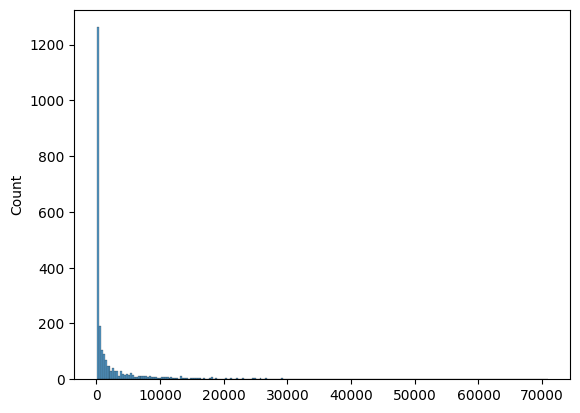

In [282]:
sns.histplot([len(tokenizer.tokenize(t)) for t in sample_text])

In [378]:
df_agg=df.groupby(["doc_id","chapter"])["passage"].agg(list).reset_index()

In [383]:
df.groupby(["doc_id","chapter"])["passage"].sum().str.len()

doc_id                  chapter                                           
CNTS-00049144800        II. Ethernet기술의 진화 1. Ethernet기술의 혁신: GigE와 10GigE     6684
                        II. Ethernet기술의 진화 2. Ethernet의 저변 확대                  2278
                        III. MAN, WAN의 새로운 대안                                   614
                        III. MAN, WAN의 새로운 대안 2. MAN, WAN을 위한 새로운 선택           5989
                        III. MAN, WAN의 새로운 대안 I. Ethernet기술의 광역화               7172
                                                                              ...  
PCY_202003160204068831                                                        17050
PCY_202003160211346251                                                         9924
PCY_202003160223106501                                                         8645
PCY_202003160257388331                                                        19786
PCY_202006030159064231                                                          686
N

In [386]:
df.groupby(["doc_id","chapter"])["passage"].sum().str.len().tolist()

[6684,
 2278,
 614,
 5989,
 7172,
 569,
 3667,
 537,
 6051,
 923,
 6727,
 8870,
 1420,
 6750,
 1872,
 1837,
 2886,
 1503,
 2364,
 3881,
 623,
 1677,
 1736,
 5206,
 8978,
 432,
 848,
 728,
 725,
 597,
 765,
 9209,
 595,
 7009,
 5081,
 2418,
 1682,
 3392,
 981,
 4045,
 1866,
 3908,
 620,
 5680,
 6810,
 3583,
 680,
 658,
 1598,
 902,
 967,
 960,
 3360,
 2599,
 2559,
 7779,
 1913,
 432,
 631,
 992,
 3171,
 5512,
 504,
 2014,
 2314,
 3968,
 612,
 719,
 1672,
 1246,
 4649,
 2824,
 11842,
 2986,
 3302,
 7030,
 4276,
 1376,
 757,
 6048,
 5198,
 3074,
 654,
 1418,
 1991,
 1542,
 1337,
 1239,
 2273,
 610,
 2267,
 1049,
 1991,
 1047,
 876,
 577,
 1376,
 811,
 3764,
 4570,
 5080,
 370,
 1681,
 875,
 5091,
 3328,
 1230,
 8424,
 4731,
 1087,
 848,
 1221,
 476,
 526,
 1105,
 1379,
 3365,
 1114,
 1443,
 1505,
 10694,
 1684,
 6863,
 5274,
 5679,
 10551,
 2859,
 674,
 520,
 752,
 900,
 889,
 614,
 600,
 943,
 1984,
 2628,
 3067,
 1787,
 2685,
 518,
 2982,
 1774,
 7287,
 1351,
 1735,
 421,
 697,
 561,
 3

In [387]:
df_agg["total_len"]=df.groupby(["doc_id","chapter"])["passage"].sum().str.len().tolist()

,doc_id,chapter,passage,total_len
0,CNTS-00049144800,II. Ethernet기술의 진화 1. Ethernet기술의 혁신: GigE와 10...,"[GigE은 8-16정도의 10/100Mpbs 포트를 1, 2개 정도의 1Gbps ...",6684
1,CNTS-00049144800,II. Ethernet기술의 진화 2. Ethernet의 저변 확대,"[우리는 모두 현재의 네트워크가 보다 넓게, 빠르게 변하지 않으면 안 된다는 것을 ...",2278
2,CNTS-00049144800,"III. MAN, WAN의 새로운 대안",[기업이 전자상거래나 인터넷혁명을 지원하기 위한 정보통신서비스를 도입함에 있어서 M...,614
3,CNTS-00049144800,"III. MAN, WAN의 새로운 대안 2. MAN, WAN을 위한 새로운 선택",[Ethernet기술이 단순하게 한 조직이나 한정된 영역의 작은 네트워크(LAN)의...,5989
4,CNTS-00049144800,"III. MAN, WAN의 새로운 대안 I. Ethernet기술의 광역화",[그리고 GigE은 Layer 2 스위치에 머물지 않고 Multilayer 스위치로...,7172
...,...,...,...,...
2412,PCY_202003160204068831,,[“깨끗하고 안전한” 에너지로의 전환은 현 정부의 핵심 에너지 정책기조이다. 에너지...,17050
2413,PCY_202003160211346251,,"[지역냉난방에서 데이터센터 폐열을 활용하는 사례는 최근 들어 미국, 중국과 지역난방...",9924
2414,PCY_202003160223106501,,"[기업의 생산 활동에는 에너지가 소비되고, 에너지 소비 과정에서 필연적으로 탄소가 ...",8645
2415,PCY_202003160257388331,,[그러나 최대수요를 기록하는 시간대에도 전력공급에 문제가 없다는 것은 연중 모든 시...,19786


In [389]:
passages=df_agg["passage"].values

In [444]:
df_agg

,doc_id,chapter,passage,total_len
0,CNTS-00049144800,II. Ethernet기술의 진화 1. Ethernet기술의 혁신: GigE와 10...,"[GigE은 8-16정도의 10/100Mpbs 포트를 1, 2개 정도의 1Gbps ...",6684
1,CNTS-00049144800,II. Ethernet기술의 진화 2. Ethernet의 저변 확대,"[우리는 모두 현재의 네트워크가 보다 넓게, 빠르게 변하지 않으면 안 된다는 것을 ...",2278
2,CNTS-00049144800,"III. MAN, WAN의 새로운 대안",[기업이 전자상거래나 인터넷혁명을 지원하기 위한 정보통신서비스를 도입함에 있어서 M...,614
3,CNTS-00049144800,"III. MAN, WAN의 새로운 대안 2. MAN, WAN을 위한 새로운 선택",[Ethernet기술이 단순하게 한 조직이나 한정된 영역의 작은 네트워크(LAN)의...,5989
4,CNTS-00049144800,"III. MAN, WAN의 새로운 대안 I. Ethernet기술의 광역화",[그리고 GigE은 Layer 2 스위치에 머물지 않고 Multilayer 스위치로...,7172
...,...,...,...,...
2412,PCY_202003160204068831,,[“깨끗하고 안전한” 에너지로의 전환은 현 정부의 핵심 에너지 정책기조이다. 에너지...,17050
2413,PCY_202003160211346251,,"[지역냉난방에서 데이터센터 폐열을 활용하는 사례는 최근 들어 미국, 중국과 지역난방...",9924
2414,PCY_202003160223106501,,"[기업의 생산 활동에는 에너지가 소비되고, 에너지 소비 과정에서 필연적으로 탄소가 ...",8645
2415,PCY_202003160257388331,,[그러나 최대수요를 기록하는 시간대에도 전력공급에 문제가 없다는 것은 연중 모든 시...,19786


In [445]:
max_length=6000

doc_list=[]

for c_list in tqdm(passages):
    # c_list - > [str, str]

    alinged_passage_list=[]
    temp_c=[]
    temp_len=0
    for idx,c in enumerate(c_list):
        c_len=len(tokenizer.tokenize(c))
        
        if idx!=len(c_list)-1 and temp_len+c_len<=max_length:
            temp_c.append(c)
            temp_len+=c_len
            continue
        if idx==len(c_list)-1 and not temp_c:
            alinged_passage_list.append(c)
            break
        
        new_c="".join(temp_c)
        alinged_passage_list.append(new_c)
        temp_c=[c]
        temp_len=c_len

        if idx==len(c_list)-1:
            alinged_passage_list.append(c)
    doc_list.append(alinged_passage_list)


100%|██████████| 2417/2417 [00:14<00:00, 165.42it/s]


In [448]:
new_doc_list=[]


for docs in doc_list:
    if len(docs)==1:
        new_doc_list.append(docs)
    else:
        if len(tokenizer.tokenize(docs[0]))+len(tokenizer.tokenize(docs[1]))<=max_length:
            new_doc_list.append([docs[0]+docs[1]])
        else:
            new_doc_list.append([docs[0],docs[1]])


In [456]:
df_agg["passage"]=new_doc_list

In [480]:
df_agg=df_agg.rename(columns={"passage":"context"})

In [484]:
df_agg.explode("context").to_csv("book.csv")

In [623]:
new_df=df_agg.explode("context")

In [626]:
new_df["source"]="도서요약"

In [628]:
new_df.to_csv("book.csv")

## 문서요약

In [461]:
base_path

'/azurestorage/data/cpt/ai_hub/'

In [467]:
doc_summary=base_path+"문서요약/"

In [ ]:
doc_list

In [493]:
doc_class=set()

for file in os.listdir(doc_summary):
    with open(doc_summary+file,"r") as f:
        sample=json.load(f)

        for doc in sample['documents']:
            doc_class.add(doc["category"])

In [ ]:
'경제','금융/재테크','기업','부동산','산업/무역','세무','증권'

In [495]:
doc_class

{'',
 'IT,과학',
 'it,과학',
 'it정책/일반',
 '가사',
 '경제',
 '광주/전남',
 '교육/입시/NIE',
 '국방/외교',
 '국제',
 '금융/재테크',
 '기업',
 '기타',
 '대구/경북',
 '메인 헤드라인',
 '문화',
 '민사',
 '보건/의료',
 '부동산',
 '북한/한반도정세',
 '사설/칼럼',
 '사회',
 '산업/무역',
 '선거',
 '세무',
 '스포츠',
 '스포츠종합',
 '야구',
 '연예/오락',
 '오피니언',
 '인물',
 '일반행정',
 '잡지',
 '정부/청와대',
 '정책',
 '정치',
 '종교',
 '종합',
 '중국/일본',
 '증권',
 '지역',
 '충북',
 '특허',
 '형사'}

In [497]:
doc_list=[]

for file in os.listdir(doc_summary):
    with open(doc_summary+file,"r") as f:
        sample=json.load(f)

        for doc in sample['documents']:
            if doc["category"] in ['경제','금융/재테크','기업','부동산','산업/무역','세무','증권']:
                doc_list.append(doc)

In [504]:
doc_list[0]

{'id': '100005',
 'category': '세무',
 'size': 'small',
 'char_count': 510,
 'publish_date': '19841226',
 'title': '법인세부과처분취소',
 'text': [[{'index': 0,
    'sentence': '수출입업체인 원고가 의류제품을 제조ㆍ수출함에 있어 같은 그룹내 종합무역상사인 소외 회사의 직수출실적을 지원하기 위하여 동 회사와 수출대행계약을 체결하고',
    'highlight_indices': '66,67'},
   {'index': 1,
    'sentence': '동 회사를 수익자로 하여 신용장을 개설한 후 동 회사명의로 제품을 수출하면서 그 수출물품에 관하여 소외 회사는 원고로부터 세금계산서를 교부받지 않았을 뿐 아니라,',
    'highlight_indices': '0,1;43,44'},
   {'index': 2,
    'sentence': '부가가치세신고시 이를 수출로 신고하지 않았고,',
    'highlight_indices': ''},
   {'index': 3,
    'sentence': '외화수입금도 원신용장상 수익자인 소외 회사에 입금되나 당해은행에서 매수 즉시,',
    'highlight_indices': '40,42'},
   {'index': 4,
    'sentence': '원화로 원고의 당좌계정에 입금되고 소외 회사는 대행수수료만 받아왔다면',
    'highlight_indices': ''},
   {'index': 5,
    'sentence': '소외 회사는 수출에 실지 참여한 바 없이 원고의 수출대행을 한 자로 명목상의 수출자에 불과할 뿐 원고가 이를 실질적으로 수출하여 그 대금에 해당하는 외화를 수입하였다 할 것이므로,',
    'highlight_indices': '11,13;20,22;48,50;72,73'},
   {'index': 6,
    'sentence': '원고는 구 법인세법시행령(1

In [505]:
df=pd.DataFrame(doc_list)

In [536]:
context=df['text'].values

In [537]:
context[0]

[[{'index': 0,
   'sentence': '수출입업체인 원고가 의류제품을 제조ㆍ수출함에 있어 같은 그룹내 종합무역상사인 소외 회사의 직수출실적을 지원하기 위하여 동 회사와 수출대행계약을 체결하고',
   'highlight_indices': '66,67'},
  {'index': 1,
   'sentence': '동 회사를 수익자로 하여 신용장을 개설한 후 동 회사명의로 제품을 수출하면서 그 수출물품에 관하여 소외 회사는 원고로부터 세금계산서를 교부받지 않았을 뿐 아니라,',
   'highlight_indices': '0,1;43,44'},
  {'index': 2,
   'sentence': '부가가치세신고시 이를 수출로 신고하지 않았고,',
   'highlight_indices': ''},
  {'index': 3,
   'sentence': '외화수입금도 원신용장상 수익자인 소외 회사에 입금되나 당해은행에서 매수 즉시,',
   'highlight_indices': '40,42'},
  {'index': 4,
   'sentence': '원화로 원고의 당좌계정에 입금되고 소외 회사는 대행수수료만 받아왔다면',
   'highlight_indices': ''},
  {'index': 5,
   'sentence': '소외 회사는 수출에 실지 참여한 바 없이 원고의 수출대행을 한 자로 명목상의 수출자에 불과할 뿐 원고가 이를 실질적으로 수출하여 그 대금에 해당하는 외화를 수입하였다 할 것이므로,',
   'highlight_indices': '11,13;20,22;48,50;72,73'},
  {'index': 6,
   'sentence': '원고는 구 법인세법시행령(1983.12.31 대통령령 제10119호로 개정되기 전의 령) 제17조 제1항 제1호 소정의 수출사업을 영위하는 법인에 해당되어 그 수출금액에 대응한 해외시장개척준비금을 설정할 수 있다.',
   'highlight_indices': '87,88'}]]

In [556]:
context[0][0]

[{'index': 0,
  'sentence': '수출입업체인 원고가 의류제품을 제조ㆍ수출함에 있어 같은 그룹내 종합무역상사인 소외 회사의 직수출실적을 지원하기 위하여 동 회사와 수출대행계약을 체결하고',
  'highlight_indices': '66,67'},
 {'index': 1,
  'sentence': '동 회사를 수익자로 하여 신용장을 개설한 후 동 회사명의로 제품을 수출하면서 그 수출물품에 관하여 소외 회사는 원고로부터 세금계산서를 교부받지 않았을 뿐 아니라,',
  'highlight_indices': '0,1;43,44'},
 {'index': 2,
  'sentence': '부가가치세신고시 이를 수출로 신고하지 않았고,',
  'highlight_indices': ''},
 {'index': 3,
  'sentence': '외화수입금도 원신용장상 수익자인 소외 회사에 입금되나 당해은행에서 매수 즉시,',
  'highlight_indices': '40,42'},
 {'index': 4,
  'sentence': '원화로 원고의 당좌계정에 입금되고 소외 회사는 대행수수료만 받아왔다면',
  'highlight_indices': ''},
 {'index': 5,
  'sentence': '소외 회사는 수출에 실지 참여한 바 없이 원고의 수출대행을 한 자로 명목상의 수출자에 불과할 뿐 원고가 이를 실질적으로 수출하여 그 대금에 해당하는 외화를 수입하였다 할 것이므로,',
  'highlight_indices': '11,13;20,22;48,50;72,73'},
 {'index': 6,
  'sentence': '원고는 구 법인세법시행령(1983.12.31 대통령령 제10119호로 개정되기 전의 령) 제17조 제1항 제1호 소정의 수출사업을 영위하는 법인에 해당되어 그 수출금액에 대응한 해외시장개척준비금을 설정할 수 있다.',
  'highlight_indices': '87,88'}]

In [583]:
new_context=[]


for c in context:
    temp_list=[]
    for l in c:
        for d in l:
            temp_list.append(d["sentence"])
    new_context.append("".join(temp_list))
    # break

    # temp_list=[]
    # for t in text:
    #     temp_list.append(t['sentence'])
    # print(temp_list)
    # break
    # new_context.append("".join(temp_list))

In [596]:
context[-8]

[[{'index': 0,
   'sentence': '최근의 일본의 외국인 관광객 증대가 일본 경제 회복에 기여했다는 분석 결과가 나왔다.',
   'highlight_indices': ''}],
 [{'index': 1,
   'sentence': '한국은행(조사국 국제경제부)은 30일 발간한 해외경제포커스에서 \'최근 일본의 방일 외국인 관광객 현황 및 특징\'이란 보고서를 통해 "지난 수년간 방일 외국인 관광객 증대는 서비스 수지 적자폭 축소, 국내 소비 증대 등을 통해 일본경제 회복에 기여해 온 것으로 평간된다"고 밝혔다.',
   'highlight_indices': '57,58'}],
 [{'index': 2,
   'sentence': '한은은 "외국인 관광객 소비 증가는 대도시 상업지역을 중심으로 지가 상승 등에도 영향을 미쳐 건설업, 부동산업 등 관련 내수산업 활성화에 영향을 미쳤다"며 "또한 체험 중시 관광, 지방 관광 등으로 관광 유형이 변화하면서 서비스 산업의 경쟁력 제고 및 지역경제 활성화에도 기여할 것으로 기대된다"고 말했다.',
   'highlight_indices': '88,90;139,140'}],
 [{'index': 3,
   'sentence': '또 "일본 정부는 2020년까지 관광객수 4000만명, 관광대국(관광수입 기준) 10위권 진입을 목표(현재 12위)로 다양한 외국인 관광객 유치 정책을 시행하고 있다"며 "도한 지자체와 기업도 이런 정부 정책기조에 적극 동참하면서 관광 인프라 및 서비스 제고에 주력하고 있다"고 했다.',
   'highlight_indices': '0,1;97,98;108,110;136,137'}],
 [{'index': 4,
   'sentence': '한은에 따르면 작년 일본을 방문한 외국인 관광객 수는 엔화 약세, 저가항공사 취항 증가 등으로 사상 최고치인 3119만명을 기록했다.',
   'highlight_indices': ''}],
 [{'index': 5,
   'sentence'

In [604]:
new_context[-128]

'1년 이상이 걸린 국가과학기술연구회(NST) 산하 25개 정부출연연구기관의 \'역할과 책임(R&R)\' 재정립 작업이 사실상 마무리됐다.출연연 R&R은 정부가 출연연 예산의 절반 이상을 차지하는 연구과제중심제도(PBS)를 개선하기 위한 선행과제로, R&R 완성도가 높은 출연연은 내년도 고유사업비 배정에서 우선권을 부여받게 된다.26일 과학기술정보통신부와 NST에 따르면 과기정통부는 R&R 수립을 통한 새로운 수익구조 포트폴리오 개선안을 제출한 출연연 중 한국과학기술연구원(KIST), 한국천문연구원, 한국한의학연구원, 한국철도기술연구원, 한국지질자원연구원, 한국화학연구원 등 총 6개 기관의 수익구조 포트폴리오를 확정했다.과기부 관계자는 이날 헤럴드경제와의 통화에서 "(6곳 외에) 2개 안팎 기관에서 추가 검토 요청이 와서 이달 말까지 해당 기관의 수익구조 포트폴리오를 받을 예정"이라며 "이에 대한 전문가 심사를 마치고 이르면 내달 중순 최종 선정기관을 발표할 계획"이라고 밝혔다.한국전자통신연구원(ETRI), 한국원자력연구원, 한국기초과학지원연구원 등 3개 기관은 추가 검토 대상인 것으로 알려졌다.수익구조 포트폴리오가 확정된 \'6개+α(알파)\' 기관에는 내년도 신규 예산 배정 시 우선권이 부여된다.우선 선정된 6개 기관에 대한 수익구조 포트폴리오 개선안은 과기혁신본부로 이관된 상태다.과기혁신본부는 국가과학기술자문회의 심의회의를 통해 부처간 논의 물꼬를 트고 해당 기관이 원하는 예산을 반영해 책정하겠다는 방침이다.혁신본부 고위 관계자는 "예산 반영에 있어 기획재정부와 공감대가 어느 정도 형성돼 있다"고 말했다.우선 선정된 6개의 출연연의 R&R에는 \'임무\' 중심의 2~6개 상위 역할이 제시됐다.이는 국민 삶의 질 개선, 국민 안전 등 현 정부가 강조해 온 정부 연구개발(R&D) 방향과 부합한다.아울러 각 상위 역할을 수행하기 위한 2~4개 수준의 주요 역할도 마련됐다.사실상 인건비를 확보하기 위해 추진해왔던 3년짜리 단기과제 대신 7년 이상 장기 대형 프로

<Axes: ylabel='Count'>

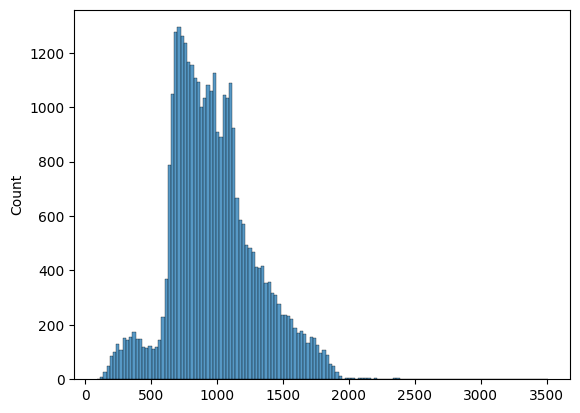

In [598]:
sns.histplot([len(l) for l in new_context])

In [611]:
df=df.rename(columns={"id":"doc_id"})

In [613]:
df["context"]=new_context

In [617]:
df=df[["doc_id","category","context"]]

In [631]:
df["source"]="문서요약"

/tmp/ipykernel_745034/1926420317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["source"]="문서요약"


In [633]:
df=df[["doc_id","category","context","source"]]

In [635]:
df.to_csv("doc_summary.csv")

## 숫자연산

In [638]:
number_cal=base_path+"숫자_연산/"

In [639]:
os.listdir(number_cal)

['숫자연산_경제_train.json', '숫자연산_경제_valid.json']

In [653]:
doc_list=[]

for file in os.listdir(number_cal):

    with open(number_cal+file,"r") as f:
        sample=json.load(f)

        for data in sample["data"]:
            doc_list.append(data)

In [655]:
doc_list[0]

{'idx': 'kpf.04101008.20220220120358001P004',
 'mediatype': '뉴스',
 'medianame': '이데일리',
 'category': '경제',
 'source': 'http://www.edaily.co.kr/news/newspath.asp?newsid=01479286632232488',
 'date': '2022-02-20',
 'title': '기업인들 "새 정부, 증세보다 \'경제성장\' 우선 지원해야"',
 'passage': "국가전략기술·신성장기술 관련 세제지원제도와 관련해서는 'R&D인건비 등 비용인정범위 확대'(39.3%)를 가장 중요하다고 응답했고 '엄격한 지원요건 완화'(25.4%), '지원대상기술 범위를 네거티브 방식으로 전환'(22.2%)도 필요하다고 답했다.\n코로나19 피해회복 지원을 위해 새 정부가 가장 중점적으로 추진해야 하는 정책에 대해선 '고용 창출·유지 기업에 대한 세제지원 확대'(52.9%)를 가장 많이 꼽았다. 다음으로 '중소기업 특별세액감면 등 직접적 세감면 확대'(30.3%), '사업재편 및 구조조정 관련 세제지원 확대'(9.9%), '중소기업 결손금 소급공제 기간 확대'(6.9%) 순이었다.\n대한상의는 “CEO 다수가 조세정책방향 1순위를 경제성장 지원으로 꼽은 만큼, 같은 맥락에서 일자리 창출 지원을 가장 효과적인 코로나 피해회복 지원 방법으로 보는 것”이라고 설명했다.",
 'qa_pairs': [{'query_id': 'e54b8b39-8a9c-46fe-98a3-107a1145e73a',
   'question': '국가 전략 기술 및 신성장 기술 관련 세제 지원 제도에 관련해서 중요하다고 응답한 항목 중 두 번째로 응답 비율이 높았던 것은 무엇인가?',
   'answer': {'number': None,
    'date': None,
    'spans': [{'calculation': None,
      'calculation_type': '양자/다자비교'

In [657]:
df=pd.DataFrame(doc_list)

In [659]:
df=df.rename(columns={"idx":"doc_id","passage":"context"})

In [662]:
df=df[["doc_id","context"]]

In [664]:
df["soruce"]="숫자연산"

/tmp/ipykernel_745034/1614300565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["soruce"]="숫자연산"


In [666]:
df.to_csv("number_cal.csv")

# 데이터 합치기

In [667]:
book=pd.read_csv("book.csv")
doc_summary=pd.read_csv("doc_summary.csv")
fin_law_rc=pd.read_csv("fin_law_rc.csv")
news_rc_fin=pd.read_csv("news_rc_fin.csv")
number_cal=pd.read_csv("number_cal.csv")

In [685]:
concat_df=pd.concat([book,doc_summary,fin_law_rc,news_rc_fin,number_cal])

In [694]:
concat_df=concat_df[["doc_id","context","source"]]

In [695]:
concat_df=concat_df.reset_index(drop=True)

In [699]:
concat_df.to_csv("ai_hub_cpt_data.csv")

NameError: name 'concat_df' is not defined

In [5]:
concat_df=pd.read_csv("ai_hub_cpt_data.csv")

# Dedup

In [19]:
concat_df=pd.read_csv("ai_hub_cpt_data.csv")

In [20]:
concat_df

,Unnamed: 0,doc_id,context,source
0,0,CNTS-00049144800,"GigE은 8-16정도의 10/100Mpbs 포트를 1, 2개 정도의 1Gbps u...",도서요약
1,1,CNTS-00049144800,"우리는 모두 현재의 네트워크가 보다 넓게, 빠르게 변하지 않으면 안 된다는 것을 잘...",도서요약
2,2,CNTS-00049144800,기업이 전자상거래나 인터넷혁명을 지원하기 위한 정보통신서비스를 도입함에 있어서 MA...,도서요약
3,3,CNTS-00049144800,Ethernet기술이 단순하게 한 조직이나 한정된 영역의 작은 네트워크(LAN)의 ...,도서요약
4,4,CNTS-00049144800,그리고 GigE은 Layer 2 스위치에 머물지 않고 Multilayer 스위치로 ...,도서요약
...,...,...,...,...
260434,260434,kpf.02100351.20220223105231001,"현대리바트가 '미유 리클라이너', '그란디오소 돌체' 등 신혼부부을 겨냥한 소파 2...",숫자연산
260435,260435,kpf.04100058.20220204060052003P002,2021년 12월 주택 유형별 거래량 및 증감률. 국토교통부 제공위와 같은 주택 매...,숫자연산
260436,260436,kpf.02100701.20190401090933002P001,"-개통 고객 대상 '갤럭시 버즈' 등 경품 제공 -기존 스마트폰 반납, 중고 시세 ...",숫자연산
260437,260437,kpf.02100351.20190715075133001,제약ㆍ바이오주가 생기를 잃어가고 있다. 잇따른 악재가 터지면서 기관투자자들을 중심으...,숫자연산


In [24]:
import xorbits.pandas as x_pd
from xorbits.experimental import dedup




res = dedup(x_pd.DataFrame(concat_df), col="context")

In [25]:
res

/opt/miniconda3/envs/translation-dictionary/lib/python3.11/site-packages/xorbits/_mars/deploy/oscar/session.py:1953: UserWarning: No existing session found, creating a new local session now.
  warnings.warn(warning_msg)


  0%|          |   0.00/100 [00:00<?, ?it/s]

/opt/miniconda3/envs/translation-dictionary/lib/python3.11/site-packages/xorbits/_mars/lib/groupby_wrapper.py:294: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  groupby_obj = obj.groupby(**groupby_kw)
/opt/miniconda3/envs/translation-dictionary/lib/python3.11/site-packages/xorbits/_mars/lib/groupby_wrapper.py:124: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  grouper=self.groupby_obj.grouper,
/opt/miniconda3/envs/translation-dictionary/lib/python3.11/site-packages/xorbits/_mars/lib/groupby_wrapper.py:294: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  groupby_obj = obj.groupby(**groupby_kw)
/opt/miniconda3/envs/translation-dictionary/lib/python3.11/site-packages/xorbits/_mars/lib/groupby_wrapper.py:294: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a f

,Unnamed: 0,doc_id,context,source
0,0,CNTS-00049144800,"GigE은 8-16정도의 10/100Mpbs 포트를 1, 2개 정도의 1Gbps u...",도서요약
1,1,CNTS-00049144800,"우리는 모두 현재의 네트워크가 보다 넓게, 빠르게 변하지 않으면 안 된다는 것을 잘...",도서요약
2,2,CNTS-00049144800,기업이 전자상거래나 인터넷혁명을 지원하기 위한 정보통신서비스를 도입함에 있어서 MA...,도서요약
3,3,CNTS-00049144800,Ethernet기술이 단순하게 한 조직이나 한정된 영역의 작은 네트워크(LAN)의 ...,도서요약
4,4,CNTS-00049144800,그리고 GigE은 Layer 2 스위치에 머물지 않고 Multilayer 스위치로 ...,도서요약
...,...,...,...,...
260432,260432,kpf.04100078.20200727140358002,Sh수협은행은 27일 현대카드와 손잡고 최대 6.4% 혜택을 주는 모바일 전용 제휴...,숫자연산
260433,260433,kpf.02100201.20190509100041001,중소기업중앙회중소기업중앙회가 한국공정거래조정원과 공정 경제 질서를 확립하기 위한 업...,숫자연산
260435,260435,kpf.04100058.20220204060052003P002,2021년 12월 주택 유형별 거래량 및 증감률. 국토교통부 제공위와 같은 주택 매...,숫자연산
260436,260436,kpf.02100701.20190401090933002P001,"-개통 고객 대상 '갤럭시 버즈' 등 경품 제공 -기존 스마트폰 반납, 중고 시세 ...",숫자연산


In [29]:
res.to_csv("ai_hub_cpt_data_dedup.csv")

  0%|          |   0.00/100 [00:00<?, ?it/s]

""


/opt/miniconda3/envs/translation-dictionary/lib/python3.11/site-packages/xorbits/core/adapter.py:248: RuntimeWarning: Series.hist will fallback to Pandas
  warnings.warn(


  0%|          |   0.00/100 [00:00<?, ?it/s]

100%|██████████| 100.00/100 [00:00<00:00, 21562.33it/s]


<Axes: >

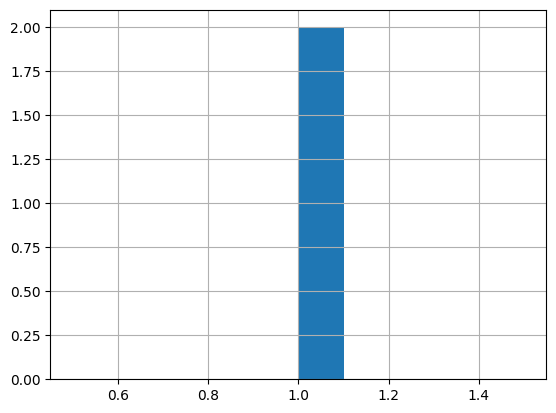

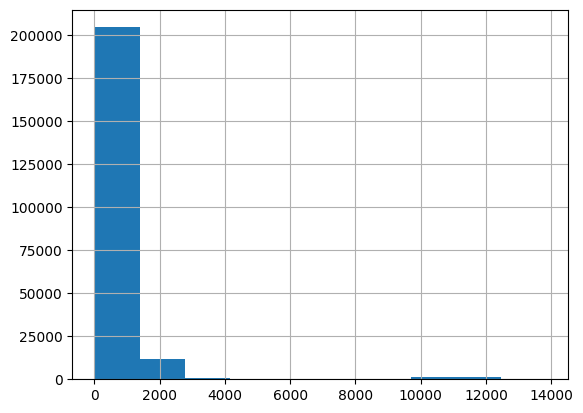

In [28]:
res['context'].str.len().hist()

<1800 , <4000, <6000, <8000, <10000, >=10000

# Sentence embedding

In [3]:
bge = SentenceTransformer("BAAI/bge-m3",model_kwargs={"torch_dtype":torch.float16})

In [4]:
df=pd.read_csv("/azurestorage/data/cpt/ai_hub/processed/ai_hub_cpt_data_dedup.csv")

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,doc_id,context,source
0,0,0,CNTS-00049144800,"GigE은 8-16정도의 10/100Mpbs 포트를 1, 2개 정도의 1Gbps u...",도서요약
1,1,1,CNTS-00049144800,"우리는 모두 현재의 네트워크가 보다 넓게, 빠르게 변하지 않으면 안 된다는 것을 잘...",도서요약
2,2,2,CNTS-00049144800,기업이 전자상거래나 인터넷혁명을 지원하기 위한 정보통신서비스를 도입함에 있어서 MA...,도서요약
3,3,3,CNTS-00049144800,Ethernet기술이 단순하게 한 조직이나 한정된 영역의 작은 네트워크(LAN)의 ...,도서요약
4,4,4,CNTS-00049144800,그리고 GigE은 Layer 2 스위치에 머물지 않고 Multilayer 스위치로 ...,도서요약
...,...,...,...,...,...
220695,260432,260432,kpf.04100078.20200727140358002,Sh수협은행은 27일 현대카드와 손잡고 최대 6.4% 혜택을 주는 모바일 전용 제휴...,숫자연산
220696,260433,260433,kpf.02100201.20190509100041001,중소기업중앙회중소기업중앙회가 한국공정거래조정원과 공정 경제 질서를 확립하기 위한 업...,숫자연산
220697,260435,260435,kpf.04100058.20220204060052003P002,2021년 12월 주택 유형별 거래량 및 증감률. 국토교통부 제공위와 같은 주택 매...,숫자연산
220698,260436,260436,kpf.02100701.20190401090933002P001,"-개통 고객 대상 '갤럭시 버즈' 등 경품 제공 -기존 스마트폰 반납, 중고 시세 ...",숫자연산


In [6]:
context=df["context"]

In [7]:
encoded=bge.encode(context,show_progress_bar=True,batch_size=16,device="cuda")

Batches:   0%|          | 0/13794 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [23]:
encoded

tensor([-0.0465, -0.0011, -0.0713,  ..., -0.0232, -0.0007,  0.0422],
       device='cuda:0')